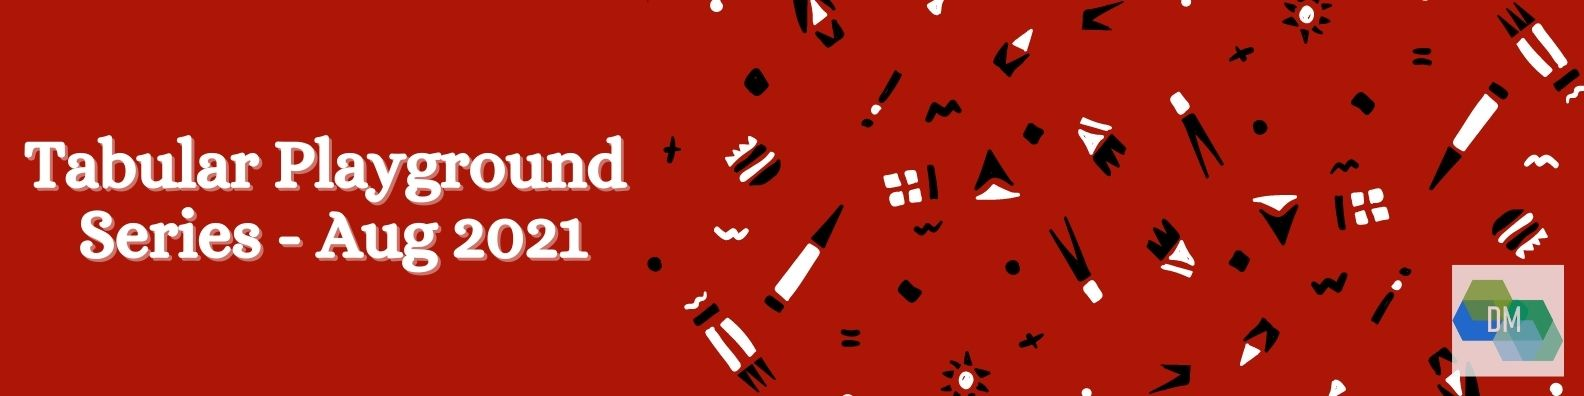

<blockquote>📌This TPS dataset has 100 features i.e f0 to f99. 
    The target variable 'loss' ranges from 0 to 42 i.e. 43 unique values in the outcome column.
    The train dataset contains 250000 rows with 102 columns and test dataset contains 150000 rows with 101 columns.<blockquote>

### <h3 style="background-color:#9d0208;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Importing Libraries & Packages 📚 </centre></strong></h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### <h3 style="background-color:#9d0208;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Importing & Reading the dataset 📝 </centre></strong></h3>

In [2]:
df_train= pd.read_csv("../input/tabular-playground-series-aug-2021/train.csv")
df_test= pd.read_csv("../input/tabular-playground-series-aug-2021/test.csv")
df_subm= pd.read_csv("../input/tabular-playground-series-aug-2021/sample_submission.csv")

In [3]:
df_train_row_count, df_train_column_count=df_train.shape
print('Total number of rows:', df_train_row_count)
print('Total number of columns:', df_train_column_count)

Total number of rows: 250000
Total number of columns: 102


In [4]:
df_test_row_count, df_test_column_count=df_test.shape
print('Total number of rows:', df_test_row_count)
print('Total number of columns:', df_test_column_count)

Total number of rows: 150000
Total number of columns: 101


In [5]:
df_train.head()

id        f0   f1        f2        f3          f4        f5        f6  \
0   0 -0.002350   59  0.766739 -1.350460     42.2727  16.68570   30.3599   
1   1  0.784462  145 -0.463845 -0.530421  27324.9000   3.47545  160.4980   
2   2  0.317816   19 -0.432571 -0.382644   1383.2600  19.71290   31.1026   
3   3  0.210753   17 -0.616454  0.946362   -119.2530   4.08235  185.2570   
4   4  0.439671   20  0.968126 -0.092546     74.3020  12.30650   72.1860   

         f7         f8  ...        f91        f92      f93       f94  \
0  1.267300   0.392007  ...  -42.43990  26.854000  1.45751  0.696161   
1  0.828007   3.735860  ... -184.13200   7.901370  1.70644 -0.494699   
2 -0.515354  34.430800  ...    7.43721  37.218100  3.25339  0.337934   
3  1.383310 -47.521400  ...    9.66778   0.626942  1.49425  0.517513   
4 -0.233964  24.399100  ...  290.65700  15.604300  1.73557 -0.476668   

         f95       f96       f97      f98       f99  loss  
0   0.941764  1.828470  0.924090  2.29658  10.48980    15  
1  -2.058300  0.819184  0.439152  2.36470   1.14383     3  
2   0.615037  2.216760  0.745268  1.69679  12.30550     6  
3 -10.222100  2.627310  0.617270  1.45645  10.02880     2  
4   1.390190  2.195740  0.826987  1.78485   7.07197     1  

[5 rows x 102 columns]

In [6]:
df_train.describe().T

count           mean           std        min           25%  \
id    250000.0  124999.500000  72168.927986   0.000000  62499.750000   
f0    250000.0       0.511213      0.307884  -0.069273      0.251287   
f1    250000.0      51.378476     42.396636 -17.000000     18.000000   
f2    250000.0       0.107155      1.322200  -7.895580     -0.611172   
f3    250000.0       0.050010      0.792368  -1.475560     -0.719418   
...        ...            ...           ...        ...           ...   
f96   250000.0       2.417556      0.892563  -1.131980      1.906718   
f97   250000.0       0.537484      0.226589   0.005249      0.359646   
f98   250000.0       1.576900      0.646306  -0.646967      1.215810   
f99   250000.0       8.048805      5.647368  -0.842397      3.732800   
loss  250000.0       6.813920      7.940179   0.000000      1.000000   

                50%            75%           max  
id    124999.500000  187499.250000  249999.00000  
f0         0.514962       0.777323       1.07207  
f1        41.000000      75.000000     273.00000  
f2         0.253815       0.759249       9.76859  
f3         0.004099       0.765456       1.68019  
...             ...            ...           ...  
f96        2.340430       2.910020       5.57604  
f97        0.531348       0.709807       1.10540  
f98        1.451285       1.901632       4.49262  
f99        7.182205      10.998550      34.01920  
loss       4.000000      10.000000      42.00000  

[102 rows x 8 columns]

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Columns: 102 entries, id to loss
dtypes: float64(95), int64(7)
memory usage: 194.5 MB


In [8]:
df_test.describe().T

count           mean           std            min            25%  \
id   150000.0  324999.500000  43301.414527  250000.000000  287499.750000   
f0   150000.0       0.513137      0.307512      -0.064172       0.254897   
f1   150000.0      51.612380     42.662212     -17.000000      18.000000   
f2   150000.0       0.108166      1.338636      -7.952920      -0.615063   
f3   150000.0       0.047793      0.790894      -1.491030      -0.718730   
..        ...            ...           ...            ...            ...   
f95  150000.0       1.565588      9.268188     -24.337800      -4.015442   
f96  150000.0       2.422223      0.894294      -1.056300       1.910507   
f97  150000.0       0.537009      0.226024       0.010615       0.359924   
f98  150000.0       1.575402      0.645402      -0.673333       1.216300   
f99  150000.0       8.045628      5.642812      -0.762355       3.719902   

               50%            75%           max  
id   324999.500000  362499.250000  399999.00000  
f0        0.516855       0.778300       1.07221  
f1       41.000000      76.000000     270.00000  
f2        0.253162       0.759430       9.93107  
f3        0.003786       0.761793       1.67042  
..             ...            ...           ...  
f95       0.811492       6.218857      42.50410  
f96       2.341185       2.918890       5.58377  
f97       0.530720       0.708449       1.10279  
f98       1.449735       1.895473       4.47294  
f99       7.191640      11.018700      33.68630  

[101 rows x 8 columns]

### <h3 style="background-color:#9d0208;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Checking for missing values ✏️ </centre></strong></h3>

In [9]:
df_train.isna().sum()

id      0
f0      0
f1      0
f2      0
f3      0
       ..
f96     0
f97     0
f98     0
f99     0
loss    0
Length: 102, dtype: int64

In [10]:
df_test.isna().sum()

id     0
f0     0
f1     0
f2     0
f3     0
      ..
f95    0
f96    0
f97    0
f98    0
f99    0
Length: 101, dtype: int64

In [11]:
print ("Unique values are:\n",df_train.nunique())

Unique values are:
 id      250000
f0      223000
f1         289
f2      232906
f3      225458
         ...  
f96     168844
f97     215966
f98     148285
f99     213501
loss        43
Length: 102, dtype: int64


<AxesSubplot:xlabel='loss', ylabel='Density'>

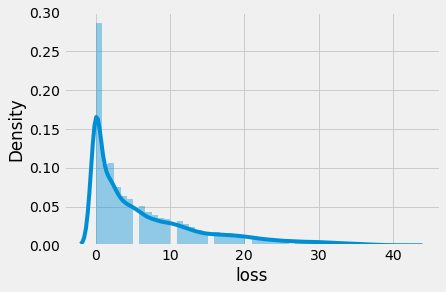

In [12]:
sns.distplot(df_train['loss'])

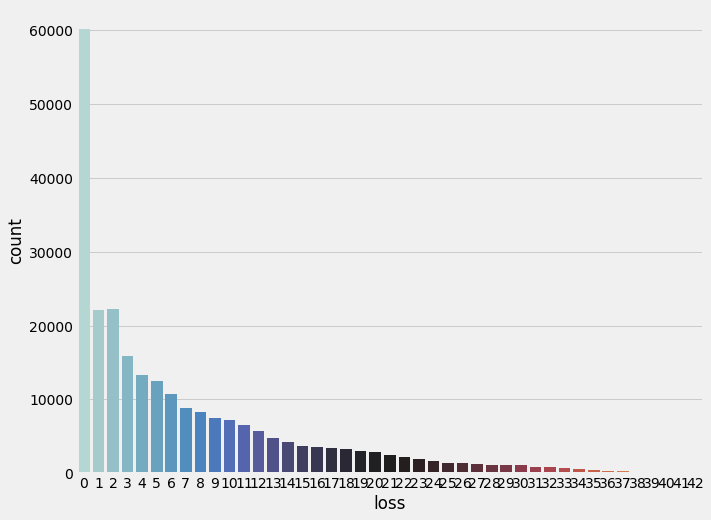

In [13]:
plt.figure(figsize = (10,8))
sns.countplot(data = df_train, x ='loss',palette='icefire');

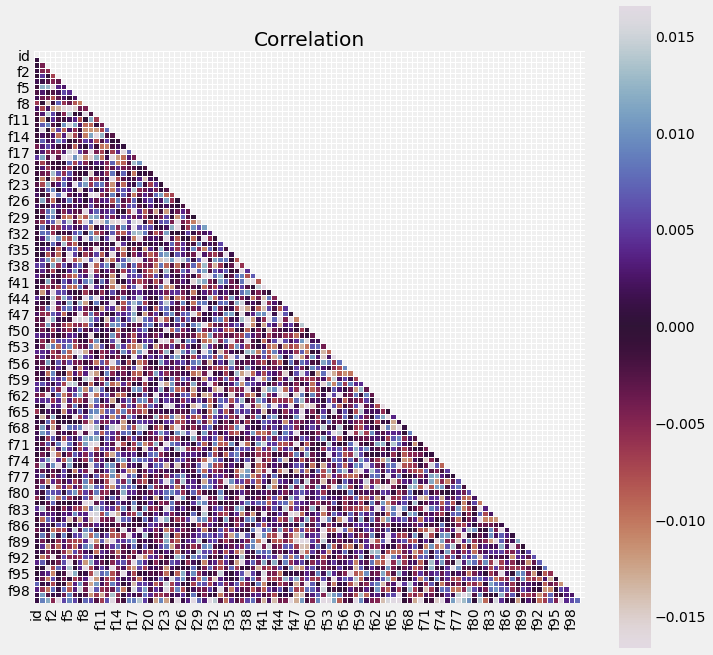

In [14]:
plt.figure(figsize=(11,11))
corr=df_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='twilight_r', robust=True, center=0,square=True, linewidths=.6)
plt.title('Correlation')
plt.show()

In [15]:
# Finding correlations 
correlations_data = df_train.corr()['loss'].sort_values()
print(correlations_data.head(20),'\n')
print(correlations_data.tail(20),'\n')

f25   -0.030164
f52   -0.026566
f58   -0.023370
f66   -0.022424
f96   -0.020655
f3    -0.018853
f73   -0.014835
f63   -0.013990
f43   -0.013676
f41   -0.013031
f47   -0.012897
f69   -0.012869
f21   -0.012347
f88   -0.012331
f23   -0.012252
f34   -0.009829
f92   -0.009560
f82   -0.009339
f55   -0.008873
f11   -0.006714
Name: loss, dtype: float64 

f48     0.010663
f76     0.010930
f54     0.011414
f1      0.011847
f78     0.012899
f18     0.013782
f81     0.013784
f32     0.014113
f84     0.015250
f64     0.015482
f77     0.015697
f65     0.016285
f53     0.016576
f70     0.017387
f31     0.019942
f74     0.021610
f28     0.022780
f46     0.023828
f13     0.025730
loss    1.000000
Name: loss, dtype: float64 



Text(0.5, 1.0, 'Features correlation')

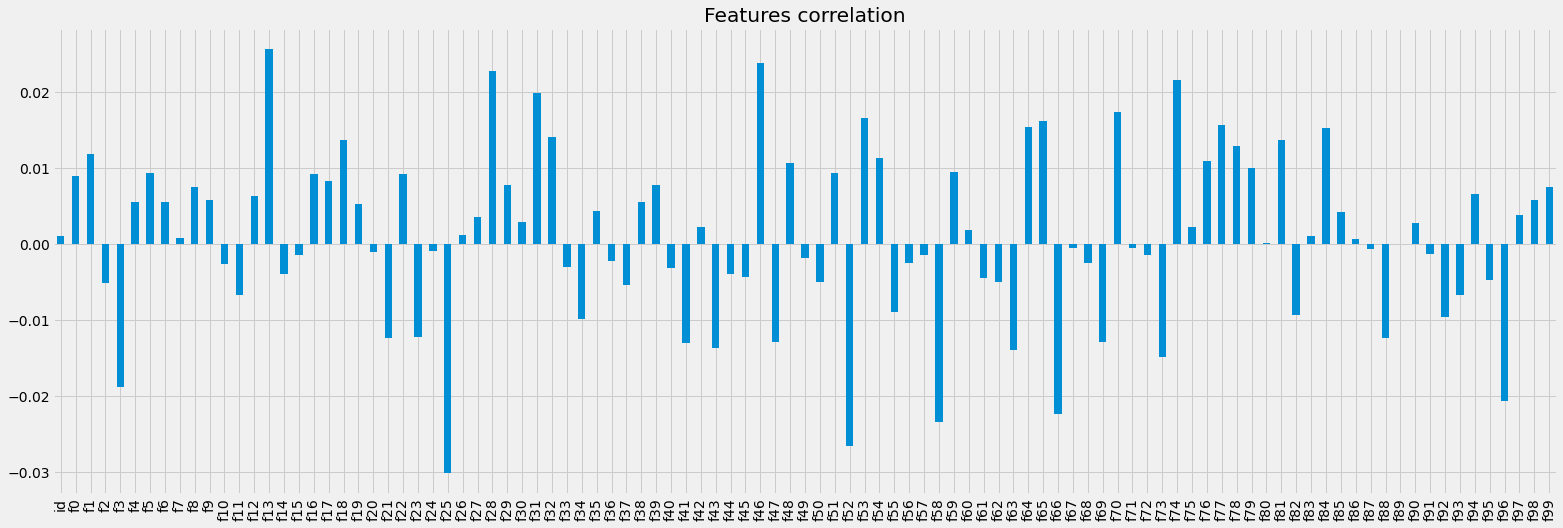

In [16]:
corr_loss = df_train.corr()
plt.figure(figsize=(24,8))
corr_loss["loss"][:-1].plot(kind="bar",grid=True)
plt.title("Features correlation")

In [17]:
df_train.drop(columns = 'id', inplace = True)
df_test.drop(columns = 'id', inplace = True)

In [18]:
#fig = plt.figure(figsize = (12,45))
#for i in range(len(df_train.columns.tolist()[:100])):
    #plt.subplot(25,4,i+1)
    #plt.title(df_train.columns.tolist()[:100][i])
    #a = sns.kdeplot(df_train[df_train.columns.tolist()[:100][i]])
#plt.tight_layout()
#plt.show()

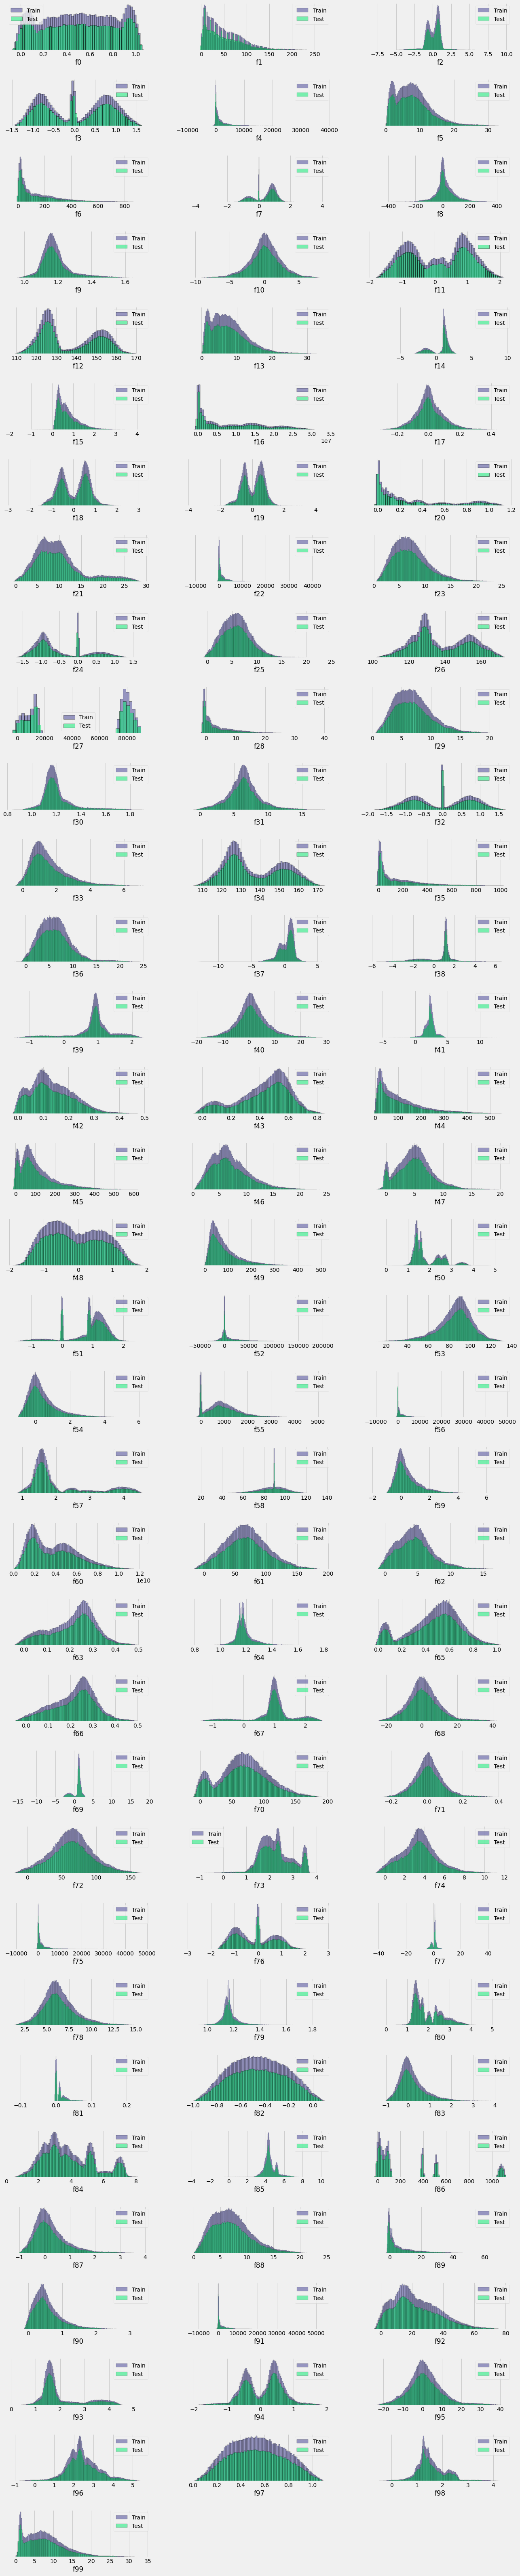

In [19]:
df = pd.concat([df_train.drop(["loss"], axis=1)])
df = df_train.columns[0:100]
plt.subplots(figsize=(20,160))
length = len(df)
for i, j in zip(df, range(length)):
    fig = plt.subplot((length/2), 3, j+1)
    plt.subplots_adjust(wspace=.25, hspace=.6)
    plt.yticks([])
    sns.histplot(x=df_train[i], alpha=0.5,edgecolor="black",color='#3e3b92')
    sns.histplot(x=df_test[i], alpha=0.5,edgecolor="black",color='#00ee6e')
    fig.legend(labels=('Train','Test'))

### <h3 style="background-color:#9d0208;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Dataset split ⏳  </centre></strong></h3>

In [20]:
# define dataset
X = df_train.drop('loss', axis=1)
y = df_train['loss']

In [21]:
from sklearn.model_selection import train_test_split

# creating dataset split for prediction
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42) # 80-20 split

# Checking split 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (200000, 100)
y_train: (200000,)
X_test: (50000, 100)
y_test: (50000,)


In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

### <h3 style="background-color:#9d0208;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>CatBoost ✏️ </centre></strong></h3>

In [23]:
from catboost import CatBoostRegressor
model1 = CatBoostRegressor(random_state=42,iterations = 5000,learning_rate=0.005,
                           early_stopping_rounds=50,task_type="GPU")
model1.fit(X,y, verbose=0)

In [24]:
from sklearn import metrics
predicted1 = model1.predict(X)

mae = metrics.mean_absolute_error(y, predicted1)
mse = metrics.mean_squared_error(y, predicted1)
rmse = np.sqrt(mse) 
r2 = metrics.r2_score(y,predicted1)
print("CatBoost Metrics:")
print("mae:",mae)
print("mse:", mse)
print("rmse:", rmse)
print("r2:", r2)

CatBoost Metrics:
mae: 6.140306820853168
mse: 61.97485301528289
rmse: 7.872410876934898
r2: 0.016992893850485857


In [25]:
y_pred1 = model1.predict(df_test)

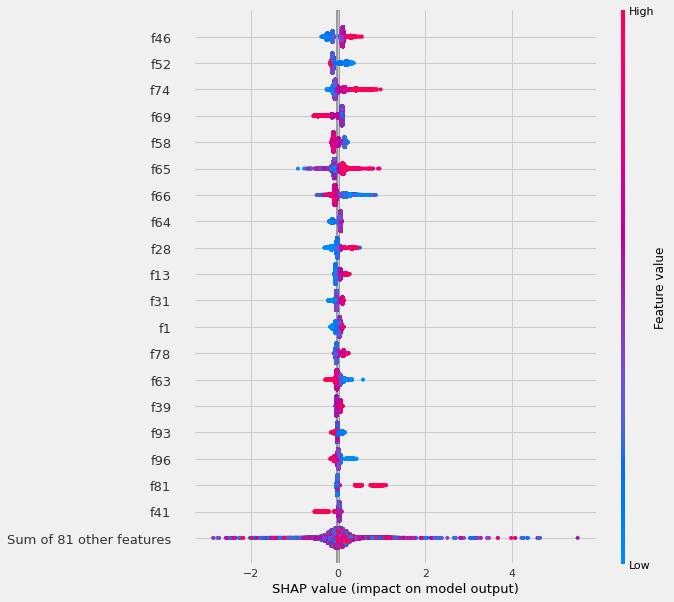

In [26]:
import shap
explainer = shap.Explainer(model1)
shap_values = explainer(X)
shap.plots.beeswarm(shap_values,max_display=20)

### <h3 style="background-color:#9d0208;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>LightGBM ✏️ </centre></strong></h3>

In [27]:
from lightgbm import LGBMRegressor
model2 = LGBMRegressor(random_state=42,n_estimators= 500,learning_rate=0.005,
                       objective='regression', max_depth=5, n_jobs = -1)
model2.fit(X,y, verbose=1)

LGBMRegressor(learning_rate=0.005, max_depth=5, n_estimators=500,
              objective='regression', random_state=42)

In [28]:
from sklearn import metrics
predicted2 = model2.predict(X)

mae = metrics.mean_absolute_error(y, predicted2)
mse = metrics.mean_squared_error(y, predicted2)
rmse = np.sqrt(mse) 
r2 = metrics.r2_score(y,predicted2)

print("LightGBM Metrics:")
print("mae:",mae)
print("mse:", mse)
print("rmse:", rmse)
print("r2:", r2)

LightGBM Metrics:
mae: 6.143776540474185
mse: 62.004666998291796
rmse: 7.874304223122942
r2: 0.016520002738454553


In [29]:
y_pred2 = model2.predict(df_test)

### <h3 style="background-color:#9d0208;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>XGBoost ✏️ </centre></strong></h3>

In [30]:
from xgboost import XGBRegressor
model3 = XGBRegressor(random_state=42,n_estimators= 500,learning_rate=0.05,
                      max_depth=8,booster='gbtree',verbosity=0,tree_method = 'gpu_hist',task_type="GPU")
model3.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=2, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             task_type='GPU', tree_method='gpu_hist', validate_parameters=1,
             verbosity=0)

In [31]:
from sklearn import metrics
predicted3 = model3.predict(X)

mae = metrics.mean_absolute_error(y, predicted3)
mse = metrics.mean_squared_error(y, predicted3)
rmse = np.sqrt(mse) 
r2 = metrics.r2_score(y,predicted3)

print("XGBoost Metrics:")
print("mae:",mae)
print("mse:", mse)
print("rmse:", rmse)
print("r2:", r2)

XGBoost Metrics:
mae: 5.067212023574114
mse: 41.666887373309876
rmse: 6.45498933951946
r2: 0.33910538893904785


In [32]:
y_pred3 = model3.predict(df_test)

In [33]:
ensembled = y_pred1*0.5 + y_pred2*0.25 + y_pred3*0.25 

### <h3 style="background-color:#9d0208;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>StackingCVRegressor ✏️ </centre></strong></h3>

More information about StackingCVRegressor: https://rasbt.github.io/mlxtend/user_guide/regressor/StackingCVRegressor/

In [34]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10,random_state=42)
regr_models = (model1,model2,model3)
model_stack = StackingCVRegressor(regressors=regr_models, meta_regressor=model1, 
                            use_features_in_secondary=True,shuffle=False,cv=kfold,random_state=42)
model_stack.fit(X, y)

0:	learn: 7.9421953	total: 7.08ms	remaining: 35.4s
1:	learn: 7.9420384	total: 13.1ms	remaining: 32.7s
2:	learn: 7.9419432	total: 18.7ms	remaining: 31.2s
3:	learn: 7.9418221	total: 24.4ms	remaining: 30.5s
4:	learn: 7.9417541	total: 30.1ms	remaining: 30.1s
5:	learn: 7.9416220	total: 35.7ms	remaining: 29.7s
6:	learn: 7.9415333	total: 41.6ms	remaining: 29.7s
7:	learn: 7.9414418	total: 59.2ms	remaining: 36.9s
8:	learn: 7.9413094	total: 68.3ms	remaining: 37.9s
9:	learn: 7.9412210	total: 79.7ms	remaining: 39.8s
10:	learn: 7.9410970	total: 90.7ms	remaining: 41.1s
11:	learn: 7.9409823	total: 105ms	remaining: 43.5s
12:	learn: 7.9408796	total: 120ms	remaining: 46.2s
13:	learn: 7.9407688	total: 126ms	remaining: 44.9s
14:	learn: 7.9406818	total: 132ms	remaining: 43.8s
15:	learn: 7.9405995	total: 138ms	remaining: 42.9s
16:	learn: 7.9405136	total: 144ms	remaining: 42.1s
17:	learn: 7.9404204	total: 149ms	remaining: 41.4s
18:	learn: 7.9402883	total: 155ms	remaining: 40.7s
19:	learn: 7.9401537	total: 16

StackingCVRegressor(cv=KFold(n_splits=10, random_state=42, shuffle=False),
                    meta_regressor=<catboost.core.CatBoostRegressor object at 0x7fdfe4198690>,
                    random_state=42,
                    regressors=(<catboost.core.CatBoostRegressor object at 0x7fdfe4198690>,
                                LGBMRegressor(learning_rate=0.005, max_depth=5,
                                              n_estimators=500,
                                              objective='regression',
                                              random_state=42),
                                XGBRegressor(base_sc...
                                             interaction_constraints='',
                                             learning_rate=0.05,
                                             max_delta_step=0, max_depth=8,
                                             min_child_weight=1, missing=nan,
                                             monotone_constraints='()',
   

In [35]:
predicted_st = model_stack.predict(X)
from sklearn import metrics

mae = metrics.mean_absolute_error(y, predicted_st)
mse = metrics.mean_squared_error(y, predicted_st)
rmse = np.sqrt(mse) 
r2 = metrics.r2_score(y,predicted_st)

print("mae:",mae)
print("mse:", mse)
print("rmse:", rmse)
print("r2:", r2)

mae: 5.635669075095844
mse: 52.84556002175232
rmse: 7.269495169662906
r2: 0.16179613984686625


In [36]:
y_pred_stack = model_stack.predict(df_test)

In [37]:
df_subm['loss'] = y_pred_stack
df_subm

id      loss
0       250000  7.060430
1       250001  5.451762
2       250002  7.899625
3       250003  7.627093
4       250004  7.803120
...        ...       ...
149995  399995  8.353869
149996  399996  7.576767
149997  399997  5.602556
149998  399998  7.259649
149999  399999  7.145503

[150000 rows x 2 columns]

In [38]:
df_subm.to_csv('submission.csv', index=False)

### <h3 style="background-color:#9d0208;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>If you found this notebook useful, please Upvote. Thanks! </centre></strong></h3>